
Column 0 Chi-Square Analysis:
Chi-Square Statistic: 39.0487
P-value: 0.0000
Interpretation:
Reject Null Hypothesis: Significant difference between observed and simulated data

Column 1 Chi-Square Analysis:
Chi-Square Statistic: 12.7563
P-value: 0.1739
Interpretation:
Fail to Reject Null Hypothesis: No significant difference between observed and simulated data

Column 2 Chi-Square Analysis:
Chi-Square Statistic: 10.2110
P-value: 0.3337
Interpretation:
Fail to Reject Null Hypothesis: No significant difference between observed and simulated data

Column 3 Chi-Square Analysis:
Chi-Square Statistic: 13.8983
P-value: 0.1260
Interpretation:
Fail to Reject Null Hypothesis: No significant difference between observed and simulated data


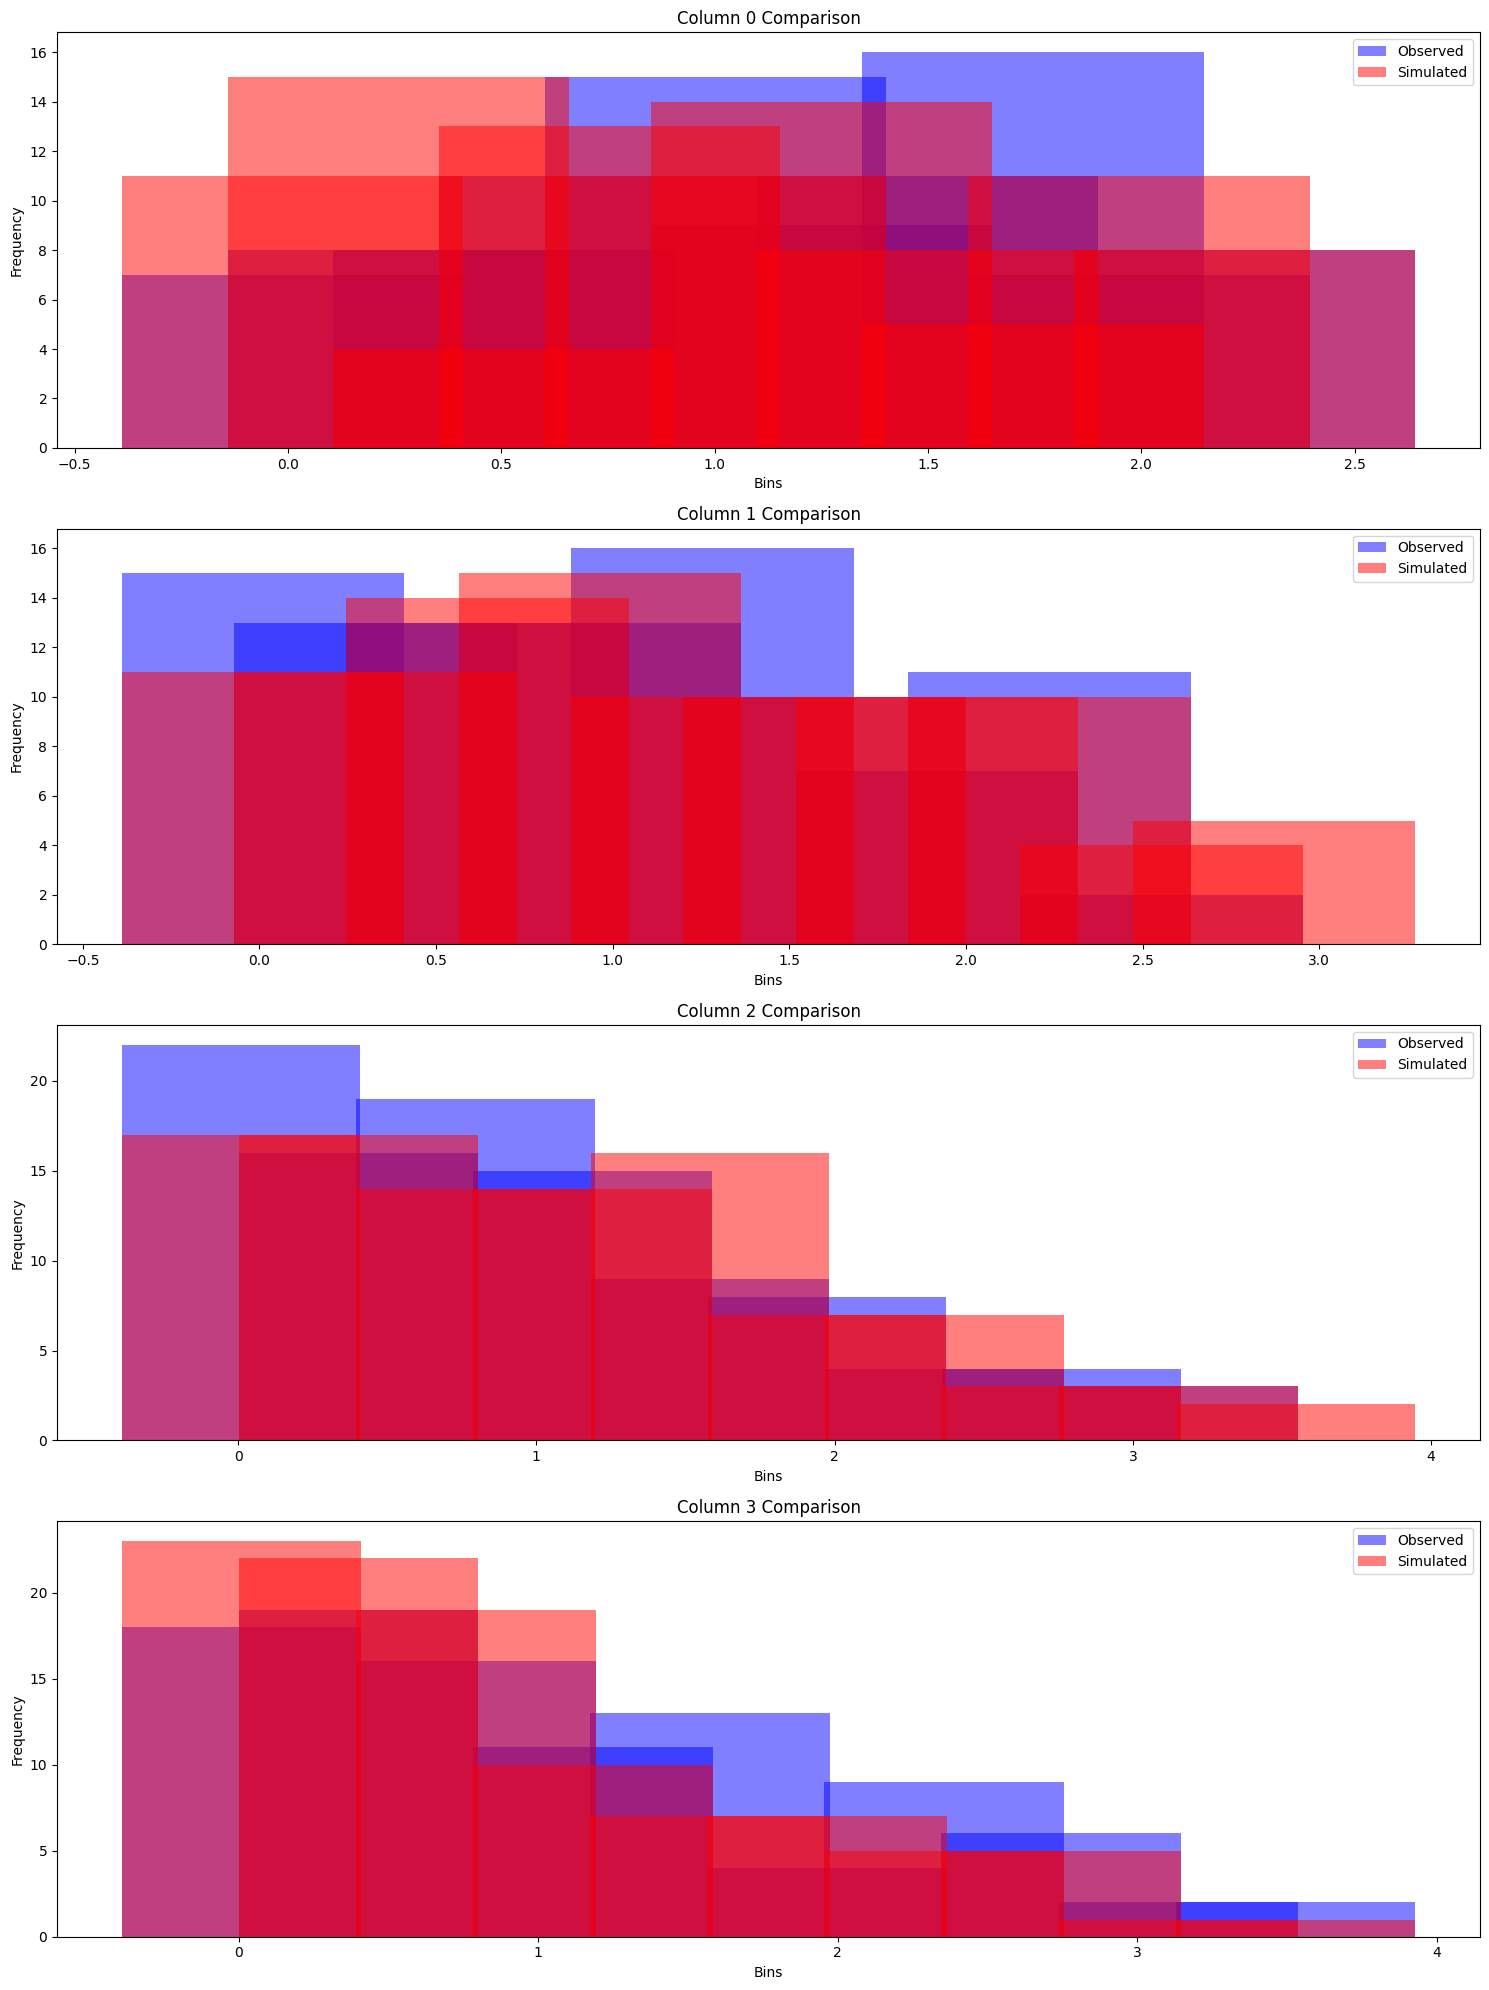

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Read the CSV files
df_observed = pd.read_csv('data2.csv', header=None)
df_simulated = pd.read_csv('data3.csv', header=None)

# Function to perform chi-square test for each column
def chi_square_analysis(observed_col, simulated_col):
    # Create histogram bins
    # Use the same number of bins for both datasets to ensure comparability
    min_val = min(observed_col.min(), simulated_col.min())
    max_val = max(observed_col.max(), simulated_col.max())
    
    # Create 10 bins across the data range
    bins = np.linspace(min_val, max_val, 11)
    
    # Compute frequency in each bin
    obs_hist, _ = np.histogram(observed_col, bins=bins)
    sim_hist, _ = np.histogram(simulated_col, bins=bins)
    
    # Perform chi-square test
    # Use chi-square test of independence
    chi2_stat, p_value = stats.chisquare(obs_hist, sim_hist)
    print(obs_hist)
    raise RuntimeError(sim_hist)
    return {
        'chi2_statistic': chi2_stat,
        'p_value': p_value,
        'obs_hist': obs_hist,
        'sim_hist': sim_hist,
        'bins': bins[:-1]  # exclude the last bin edge
    }

# Store results for each column
results = []

# Perform analysis for each column
for col in range(df_observed.shape[1]):
    column_result = chi_square_analysis(
        df_observed[col], 
        df_simulated[col]
    )
    column_result['column'] = col
    results.append(column_result)

# Visualization and detailed reporting
plt.figure(figsize=(15, 5 * len(results)))
for i, result in enumerate(results):
    plt.subplot(len(results), 1, i+1)
    plt.bar(result['bins'], result['obs_hist'], alpha=0.5, label='Observed', color='blue')
    plt.bar(result['bins'], result['sim_hist'], alpha=0.5, label='Simulated', color='red')
    plt.title(f'Column {result["column"]} Comparison')
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.legend()
    
    # Print statistical results
    print(f"\nColumn {result['column']} Chi-Square Analysis:")
    print(f"Chi-Square Statistic: {result['chi2_statistic']:.4f}")
    print(f"P-value: {result['p_value']:.4f}")
    print("Interpretation:")
    if result['p_value'] < 0.05:
        print("Reject Null Hypothesis: Significant difference between observed and simulated data")
    else:
        print("Fail to Reject Null Hypothesis: No significant difference between observed and simulated data")

plt.tight_layout()
plt.show()